# Extracción de Características (PCA)

El Análisis de Componentes Principales (PCA, Principal Component Analysis) es un método no supervisado para la reducción de dimensionalidad en los datos. Adicionalmente, este puede ser empleado como una herramienta de visualización, filtrado de ruido, entre otros.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Consideremos los siguientes 200 puntos aleatorios cuya dependencia es aproximadamente lineal ([Make Regression Function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html): Generate a random regression problem).

In [2]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=200, n_features=1, noise=20, bias=0)
data = np.column_stack((x, y/100))

In [3]:
data

array([[-1.43266110e+00, -1.03160679e+00],
       [ 5.50816476e-01,  4.74704246e-01],
       [-1.73333305e-01, -2.18657971e-01],
       [ 1.21338111e-01,  2.48513434e-01],
       [-1.87130892e+00, -1.52019870e+00],
       [-5.29055778e-01, -4.92130535e-01],
       [-9.34300527e-01, -8.34920795e-01],
       [ 5.18756897e-01,  2.48290650e-01],
       [ 1.86338224e-01,  2.70429315e-01],
       [-2.57226769e-01, -3.09154292e-01],
       [-5.71911857e-01, -3.79638007e-01],
       [ 1.40491768e-01, -6.10479250e-02],
       [-5.79793984e-01, -2.46223297e-01],
       [ 5.14906500e-01,  7.02078589e-01],
       [-6.17185176e-01, -7.70145240e-01],
       [-1.43013633e+00, -9.00354941e-01],
       [ 7.47260119e-01,  4.03568821e-01],
       [-4.20226514e-01, -5.27387845e-01],
       [-2.72112681e+00, -2.15615097e+00],
       [-2.86205955e-01, -1.27598330e-01],
       [ 8.13511762e-01,  7.27893552e-01],
       [ 2.23159448e-01,  4.78696361e-01],
       [-1.91256823e+00, -1.38379882e+00],
       [-1.

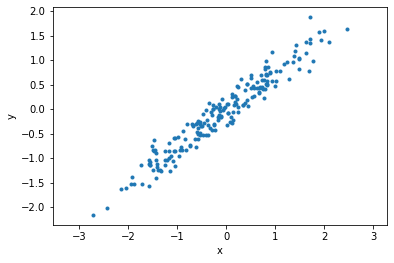

In [4]:
plt.plot(data[:,0], data[:,1], '.')
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

El Análisis de Componentes Principales tiene por objetivo encontrar los *ejes principales* y utilizarlos para describir el conjunto de datos. El estimador [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) de Scikit-learn permite obtener estos componentes.

In [5]:
from sklearn.decomposition import PCA

In [6]:
#1. Crear objeto PCA
pca = PCA(n_components = 2)

#2. Ajustar objeto al conjunto de datos
pca.fit(data)

PCA(n_components=2)

El estimador permite la obtención de los *componentes principales* así como la varianza explicada (*explained variance*), definida como el cuadrado de la longitud del vector.

In [7]:
data_components = pca.components_
print("Componentes Principales: ")
print(data_components)

Componentes Principales: 
[[-0.79207898 -0.61041862]
 [-0.61041862  0.79207898]]


In [8]:
data_explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ")
print(data_explained_variance)

Explained Variance: 
[0.98553282 0.01446718]


Gráficamente observemos que representan estos valor con apoyo de la función *draw_vector*.

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

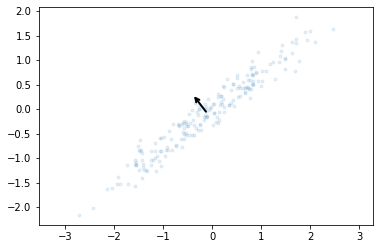

In [10]:
plt.plot(data[:,0], data[:,1], '.', alpha = 0.1)

for length, vector in zip(data_explained_variance, data_components):
    v = vector * np.sqrt(length)*4
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')
plt.show()

Los vectores representan los *ejes principales* y su importancia es con base en la varianza explicada. Observe que la longitud es proporcional a su importancia, ya que esta se basa la varianza de los datos al ser proyectados sobre los ejes.

Observemos que ocurre al realizar una transformación hacia los ejes descritos por el PCA. Esta transformación únicamente incluye operaciones de traslación, rotación y escalamiento.

In [11]:
#3. Transformación
data_pca = pca.transform(data)
lenght = np.sqrt(data_explained_variance)

In [12]:
data_pca

array([[ 1.63344339e+00,  6.03806675e-02],
       [-8.57107810e-01,  4.27463106e-02],
       [ 1.39717218e-01, -6.44168106e-02],
       [-3.78855942e-01,  1.25746916e-01],
       [ 2.27913271e+00, -5.88639170e-02],
       [ 5.88410256e-01, -6.38890559e-02],
       [ 1.11864166e+00, -8.80370717e-02],
       [-6.93507015e-01, -1.17021374e-01],
       [-4.43719027e-01,  1.03428746e-01],
       [ 2.61408106e-01, -8.48869110e-02],
       [ 5.53688121e-01,  5.13740591e-02],
       [-2.05065132e-01, -1.31141876e-01],
       [ 4.78492564e-01,  1.61860443e-01],
       [-9.67457806e-01,  2.44764866e-01],
       [ 8.27921053e-01, -2.30302832e-01],
       [ 1.55132500e+00,  1.62801328e-01],
       [-9.69284301e-01, -1.33511422e-01],
       [ 5.23730602e-01, -1.58247039e-01],
       [ 3.34045270e+00, -4.38436664e-02],
       [ 1.73536770e-01,  7.66091847e-02],
       [-1.21973469e+00,  8.29381414e-02],
       [-6.00014428e-01,  2.45916333e-01],
       [ 2.22855231e+00,  7.43610108e-02],
       [-8.

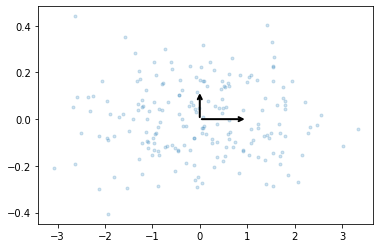

In [13]:
plt.plot(data_pca[:,0], data_pca[:,1], '.', alpha = 0.2)
draw_vector([0,0],[0,lenght[1]])
draw_vector([0,0],[lenght[0], 0])
plt.show()

El PCA puede emplearse para la reducción de dimensionalidad mediante la discriminación de los componentes principales menores. Esto resultará en una proyección de menor dimensionalidad que preserva la máxima varianza en los datos.

In [14]:
#1. Creación de objeto PCA
pca_reduction = PCA(n_components = 1)

#2. Ajuste de objeto PCA
pca_reduction.fit(data)

#3. Transformación de "data" utilizando objeto PCA
data_pca_reduction = pca_reduction.transform(data)

La dimensión en los datos ha sido reducida.

In [15]:
print("Tamaño Original: \n", data.shape)
print("Tamaño Reducido: \n", data_pca_reduction.shape)

Tamaño Original: 
 (200, 2)
Tamaño Reducido: 
 (200, 1)


In [16]:
data_pca_reduction

array([[ 1.63344339],
       [-0.85710781],
       [ 0.13971722],
       [-0.37885594],
       [ 2.27913271],
       [ 0.58841026],
       [ 1.11864166],
       [-0.69350701],
       [-0.44371903],
       [ 0.26140811],
       [ 0.55368812],
       [-0.20506513],
       [ 0.47849256],
       [-0.96745781],
       [ 0.82792105],
       [ 1.551325  ],
       [-0.9692843 ],
       [ 0.5237306 ],
       [ 3.3404527 ],
       [ 0.17353677],
       [-1.21973469],
       [-0.60001443],
       [ 2.22855231],
       [-0.00809464],
       [-0.11520834],
       [ 1.55369553],
       [ 0.30862488],
       [ 1.52859782],
       [-1.58829499],
       [ 0.90317767],
       [-2.12644802],
       [ 0.62906736],
       [-2.63068435],
       [-1.0909578 ],
       [ 1.08945054],
       [-0.07044188],
       [ 0.06965915],
       [ 1.38353324],
       [ 0.21516516],
       [ 1.40861559],
       [ 1.03523596],
       [-1.09823008],
       [-1.94469928],
       [-0.96824852],
       [ 0.25518766],
       [-0

La visualización de este proceso de reducción de dimensionalidad puede apreciarse en mejor medida a través de la obtención de la transformación inversa de los datos reducidos. La siguiente gráfica presenta los datos reducidos frente a los datos originales.

In [17]:
data_reduced = pca_reduction.inverse_transform(data_pca_reduction)

In [18]:
data_reduced

array([[-1.39580362e+00, -1.07943304e+00],
       [ 5.76909620e-01,  4.40845792e-01],
       [-2.12654526e-01, -1.67634770e-01],
       [ 1.98096371e-01,  1.48911945e-01],
       [-1.90724055e+00, -1.47357383e+00],
       [-5.68054848e-01, -4.41525357e-01],
       [-9.88039995e-01, -7.65188482e-01],
       [ 4.47324870e-01,  3.40980820e-01],
       [ 2.49473057e-01,  1.88505580e-01],
       [-3.09043320e-01, -2.41917155e-01],
       [-5.40552174e-01, -4.20330319e-01],
       [ 6.04403240e-02,  4.28267976e-02],
       [-4.80991355e-01, -3.74429550e-01],
       [ 6.64315532e-01,  5.08205486e-01],
       [-7.57766314e-01, -5.87727208e-01],
       [-1.33075937e+00, -1.02930645e+00],
       [ 6.65762260e-01,  5.09320412e-01],
       [-5.16823454e-01, -4.02043692e-01],
       [-2.74788980e+00, -2.12142332e+00],
       [-2.39442282e-01, -1.88278855e-01],
       [ 8.64138748e-01,  6.62199994e-01],
       [ 3.73271358e-01,  2.83911204e-01],
       [-1.86717688e+00, -1.44269861e+00],
       [-9.

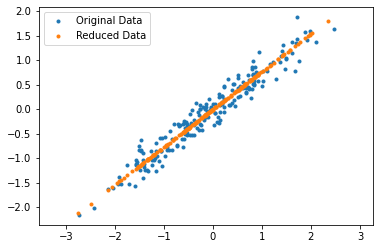

In [19]:
plt.plot(data[:,0], data[:,1], '.', data = 0.2, label = 'Original Data')
plt.plot(data_reduced[:,0], data_reduced[:,1], '.', data = 0.8, label = 'Reduced Data')
plt.axis('equal')
plt.legend()
plt.show()

La información en relación al eje de menor importancia es eliminada, dejando únicamente los componentes con mayor varianza. 

## Labeled Faces in the Wild

Labeled Faces in the Wild es un bechmark público para la verificación de rostros([Link](http://vis-www.cs.umass.edu/lfw/)). Este conjunto de datos se encuentra contenido en los conjuntos de datos de *Scikit-Learn* ([fetch_lfw_people](https://scikit-learn.org/0.19/datasets/labeled_faces.html)).

In [20]:
from sklearn.datasets import fetch_lfw_people

In [21]:
faces = fetch_lfw_people(min_faces_per_person = 60)

In [22]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [23]:
print(faces.target_names)
print(faces.images.shape)
print(faces.data[0].shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(2914,)


La dimensionalidad de cada imagen es de alrededor de 3000 características. En este caso en particular se empleará la función RandomizedPCA (svd_solver = 'randomized'), la cual contiene un método aleatorio para aproximar los primeros N componentes principales más rápido que el estimador convencional. Realicemos la reducción de los primeros 150 componentes.

In [24]:
pca = PCA(150, svd_solver = 'randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

In [25]:
len(pca.components_[0])

2914

In [26]:
pca.components_

array([[-0.00579718, -0.00595361, -0.00615769, ..., -0.01000112,
        -0.00901091, -0.00813914],
       [ 0.0170836 ,  0.01623676,  0.01622028, ..., -0.03474266,
        -0.03416986, -0.03298328],
       [-0.01833663, -0.01670177, -0.01557057, ..., -0.03540297,
        -0.031477  , -0.02929785],
       ...,
       [ 0.07048056,  0.03690405, -0.0142447 , ...,  0.04061798,
         0.00353009,  0.0123211 ],
       [ 0.02196351,  0.00721548, -0.00857549, ..., -0.05225378,
        -0.02280025,  0.01149334],
       [ 0.01047277,  0.00648261, -0.01331108, ..., -0.05318961,
        -0.00311332,  0.06493905]], dtype=float32)

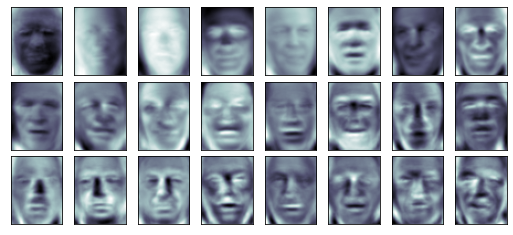

In [27]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Una parte importante del PCA es la selección de la cantidad de componentes que son neesarios para describir los datos. Esto puede ser determinado mediante la razón de la variancia explicada acumulada (*cumulative explained variance ratio*) como función del número de componentes.

In [28]:
pca.explained_variance_ratio_

array([0.18782704, 0.14550345, 0.07100115, 0.06029006, 0.05040159,
       0.02936219, 0.02469284, 0.02047785, 0.01968621, 0.01891434,
       0.01561242, 0.01469928, 0.01214478, 0.0109576 , 0.01042821,
       0.0097199 , 0.00906833, 0.00877008, 0.00813054, 0.00704724,
       0.00682863, 0.00647883, 0.00603495, 0.00578391, 0.00532262,
       0.00520684, 0.00500025, 0.00476452, 0.00452436, 0.00425207,
       0.00405164, 0.0038007 , 0.00359863, 0.00350867, 0.00347822,
       0.00324879, 0.00314475, 0.00310488, 0.00307685, 0.00289922,
       0.00282612, 0.00274748, 0.00272808, 0.0025997 , 0.00246546,
       0.002382  , 0.00235044, 0.0023152 , 0.00227269, 0.00221832,
       0.00210567, 0.00205797, 0.00202996, 0.0020065 , 0.00195754,
       0.00195432, 0.00188095, 0.00182764, 0.00176693, 0.00175856,
       0.00174926, 0.0016632 , 0.00161306, 0.00158565, 0.00156576,
       0.00152887, 0.00149984, 0.00146119, 0.00145264, 0.00141041,
       0.0014052 , 0.00136414, 0.00136121, 0.00131623, 0.00129

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18782704, 0.33333048, 0.40433162, 0.4646217 , 0.5150233 ,
       0.5443855 , 0.5690783 , 0.58955616, 0.6092424 , 0.6281567 ,
       0.64376915, 0.6584684 , 0.6706132 , 0.6815708 , 0.691999  ,
       0.7017189 , 0.71078724, 0.7195573 , 0.72768784, 0.7347351 ,
       0.7415637 , 0.7480425 , 0.7540775 , 0.7598614 , 0.76518404,
       0.77039087, 0.7753911 , 0.7801556 , 0.78467995, 0.788932  ,
       0.79298365, 0.79678434, 0.800383  , 0.80389166, 0.8073699 ,
       0.8106187 , 0.81376344, 0.8168683 , 0.81994516, 0.8228444 ,
       0.8256705 , 0.82841796, 0.83114606, 0.8337458 , 0.83621126,
       0.83859324, 0.8409437 , 0.8432589 , 0.8455316 , 0.8477499 ,
       0.84985554, 0.8519135 , 0.85394347, 0.85594994, 0.8579075 ,
       0.8598618 , 0.86174273, 0.8635704 , 0.8653373 , 0.8670959 ,
       0.86884516, 0.8705084 , 0.87212145, 0.8737071 , 0.87527287,
       0.8768017 , 0.87830156, 0.87976277, 0.8812154 , 0.8826258 ,
       0.884031  , 0.8853951 , 0.8867563 , 0.88807255, 0.88936

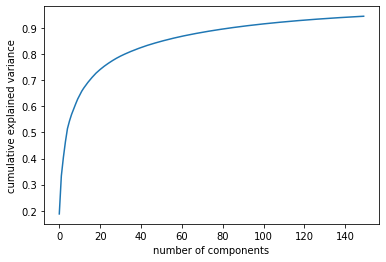

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Comparemos la imágenes de entrada con las reconstruidas a partir de esos 150 componentes.

In [31]:
pca = PCA(150, svd_solver = 'randomized')
faces_fitted = pca.fit(faces.data)
faces_components = pca.transform(faces.data)
faces_projected = pca.inverse_transform(faces_components)

In [32]:
faces_components.shape

(1348, 150)

In [33]:
faces_projected.shape

(1348, 2914)

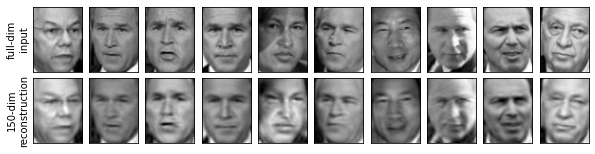

In [34]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(faces_projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

## Iris Dataset

El conjunto de datos Iris (Iris Dataset) está integrado por 150 muestra de 3 flores diferentes: setosa, versicolor y virgínica junto con sus medidas de longitud y anchura tanto del pétalo como del sépalo. El objetivo es clasificar de acuerdo a sus características estructurales el tipo de planta.

In [35]:
from sklearn.datasets import load_iris

In [36]:
# Loading Iris Dataset
iris = load_iris()

In [37]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [38]:
#iris["DESCR"]
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [40]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [41]:
print(iris.feature_names)
#En caso de utilizar feature_names para crear los nombres de columnas
#te sugerimos reemplazar los espacio (" ") por "_" para facilitar el análisis
#iris_data.columns = iris_data.columns.str.replace(" ", "_")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [42]:
# Mapping Function
def flowers(value):
    flower = iris.target_names[value] 
    return flower

In [43]:
flowers(2)

'virginica'

In [44]:
# Iris DataFrame
iris_columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_data = pd.DataFrame(iris.data, columns = iris_columns)
iris_data["species"] = iris.target
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
# Edit column names
iris_data.species = iris_data.species.apply(flowers)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


El PCA es altamente afectado por el escalamiento de modo que es importante aplicar estrategias de escalamiento o normalización previo a la aplicación del método. De acuerdo a Galarnyk (2017), puede encontrarse una discusión más extensa en el siguiente [enlace](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

a) Utilizar `StandardScaler` para transformar los datos. Separar las variables de entrada (`data`) y la variable objetivo (`target`).

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# Separar las características
data = iris_data.values[:,:-1]
      #iris.data
target = iris_data.values[:,-1]  
      #iris.target

In [48]:
# StandardScaler

# 1. Crear el objeto
scaler = StandardScaler()

# 2. Ajustar el objeto
scaler.fit(data)

# 3. Transformar los datos con el objeto
data = scaler.transform(data)

In [49]:
pd.DataFrame(data, columns = iris_columns).head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


b) Reducir la dimensionalidad del iris dataset a 2. Almacenar la transformación resultante en un dataframe denominado *pca_components* conformado con las siguientes columns:
* cp1: componente principal 1
* cp2: componentes principal 2
* species: especie correspondiente.

La función *pandas.concat* pudiera ser de relevancia para este ejercicio ([Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)).

In [50]:
# PCA
# 1. Crear el PCA object
pca = PCA(n_components = 2)

# 2. Ajustar el PCA object
pca.fit(data)

# 3. Transformar los datos utilizando PCA object
pca_components = pca.transform(data)

In [51]:
pca_components = pd.DataFrame(pca_components, columns = ["cp1", "cp2"])
pca_components.head()

,cp1,cp2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [52]:
pca_transformation = pd.concat([pca_components, iris_data["species"]], axis = 1)
pca_transformation.head()

,cp1,cp2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


A continuación se presenta un gráfico de dispersión con cp1 y cp2 en ambos ejes e indicando su especia a través del color. No olvide que debe completar la asignación anterior antes de ejecutar la siguiente línea.

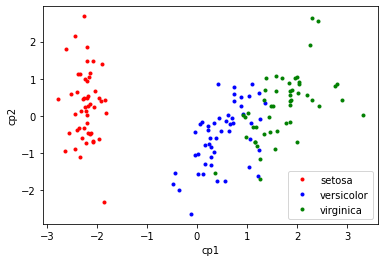

In [53]:
plt.plot(pca_transformation.cp1[pca_transformation.species == 'setosa'], pca_transformation.cp2[pca_transformation.species == 'setosa'], '.', color = 'red', label='setosa' )
plt.plot(pca_transformation.cp1[pca_transformation.species == 'versicolor'], pca_transformation.cp2[pca_transformation.species == 'versicolor'], '.', color = 'blue', label='versicolor' )
plt.plot(pca_transformation.cp1[pca_transformation.species == 'virginica'], pca_transformation.cp2[pca_transformation.species == 'virginica'], '.', color = 'green', label='virginica' )
plt.xlabel("cp1")
plt.ylabel("cp2")
plt.legend()
plt.show()

c) ¿Cuál es el valor de la razón de la varianza explicada?

In [54]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.72962445, 0.22850762])

In [55]:
explained_variance_ratio.sum()

0.9581320720000164

Notebook based on:
* Python Data Science Handbook. Principal Component Analysis.
* PCA using Python (scikit-learn): [Link](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)